# START

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading data

In [ ]:
df = pd.read_csv('/content/datasets_618_1171_titanic_data.csv')

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.shape

(891, 12)

## DATA PREPROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum() # no of values missing in out dataframe

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Bar graph

Pclass           3

Sex              2

SibSp            7

Parch            7

Embarked         3

In [ ]:
def plot_bar(name_col):
    sur = df[df['Survived'] == 1][name_col].value_counts()
    death = df[df['Survived'] == 0][name_col].value_counts()
    temp = pd.DataFrame([sur, death])
    temp.index = ['sur', 'death'] # use change the name of row index
    # print(temp.head())
    temp.plot(kind = 'bar', title= name_col, figsize = (10, 5))
    plt.show()

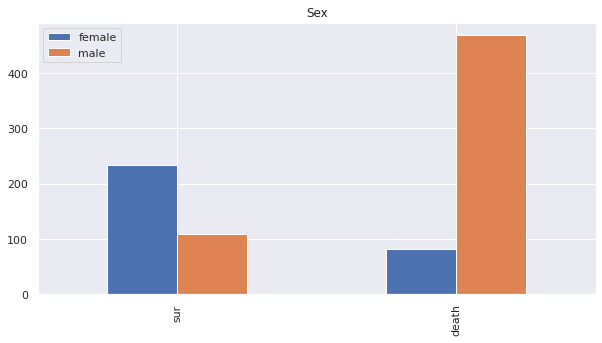

In [ ]:
plot_bar('Sex')

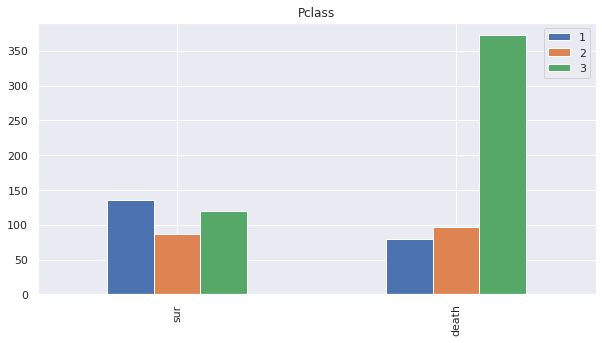

In [ ]:
plot_bar('Pclass')

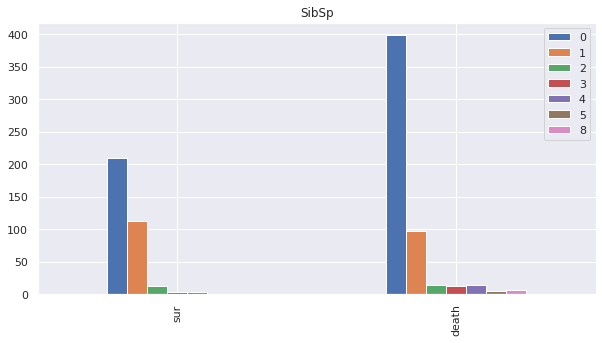

In [ ]:
plot_bar('SibSp')

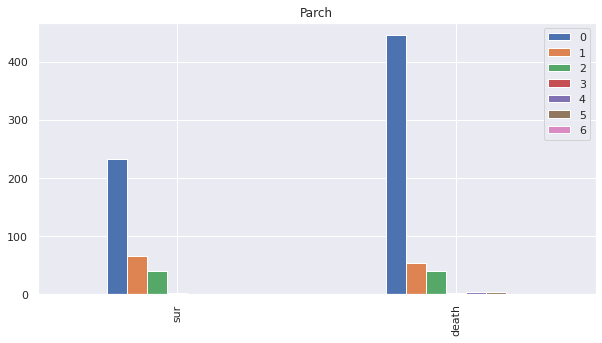

In [ ]:
plot_bar('Parch')

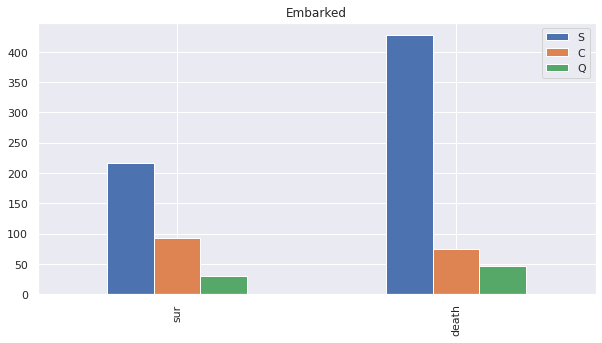

In [ ]:
plot_bar('Embarked')

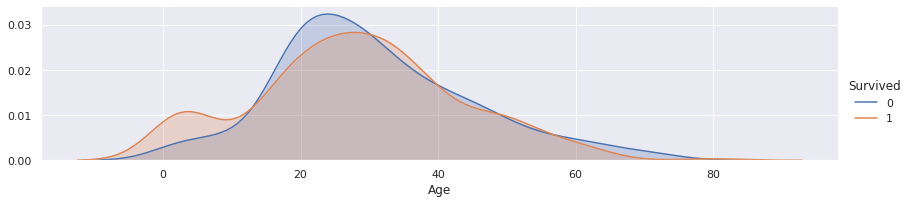

In [ ]:
facet = sns.FacetGrid(df, hue = 'Survived', aspect= 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.add_legend()
plt.show()

## feature engineering

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
drop_col = ['PassengerId', 'Ticket', 'Cabin']
drop_col

['PassengerId', 'Ticket', 'Cabin']

In [ ]:
df.drop(drop_col, axis = 1, inplace= True)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
Name_title = []

for name in df['Name'].values:
    temp = name.strip().split()
    for ele in temp:
        if '.' in ele :
            Name_title.append(ele[:-1])
            break

In [ ]:
len(Name_title)

891

In [ ]:
df['Name_title'] = Name_title

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [ ]:
df.drop('Name', axis = 1, inplace  = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
family_size = df['Parch'].values + df['SibSp'].values

In [ ]:
df['family_size'] = family_size

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title,family_size
0,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,0


## Filling NAN values

In [ ]:
df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Name_title       0
family_size      0
dtype: int64

In [ ]:
df['Age'].median()

28.0

In [ ]:
df['Age'].fillna(df['Age'].median(), axis = 0, inplace = True)

In [ ]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Name_title     0
family_size    0
dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'].fillna('S', axis = 0, inplace = True)

In [ ]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Name_title     0
family_size    0
dtype: int64

## Label Encoding

strings --> integers

In [ ]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Name_title', 'family_size']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title,family_size
0,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_emb = LabelEncoder()
le_new_t = LabelEncoder()

In [ ]:
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_emb.fit_transform(df['Embarked'])
df['Name_title'] = le_new_t.fit_transform(df['Name_title'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title,family_size
0,0,3,1,22.0,1,0,7.2500,2,12,1
1,1,1,0,38.0,1,0,71.2833,0,13,1
2,1,3,0,26.0,0,0,7.9250,2,9,0
3,1,1,0,35.0,1,0,53.1000,2,13,1
4,0,3,1,35.0,0,0,8.0500,2,12,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Name_title   891 non-null    int64  
 9   family_size  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


## splitting into feature and target

In [ ]:
X = df.iloc[:, 1:].values # features
y = df.iloc[:, 0].values # targets

In [ ]:
X.shape, y.shape

((891, 9), (891,))

# Scalling

1. Standard scalling ---> [-1, 1]

2. Min-Max scalling ---> [0, 1]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_x = StandardScaler()

In [ ]:
X_scaled = sc_x.fit_transform(X)

In [ ]:
X_scaled[:10]

array([[ 0.82737724,  0.73769513, -0.56573646,  0.43279337, -0.47367361,
        -0.50244517,  0.58595414,  0.41788732,  0.05915988],
       [-1.56610693, -1.35557354,  0.66386103,  0.43279337, -0.47367361,
         0.78684529, -1.9423032 ,  0.95439683,  0.05915988],
       [ 0.82737724, -1.35557354, -0.25833709, -0.4745452 , -0.47367361,
        -0.48885426,  0.58595414, -1.19164121, -0.56097483],
       [-1.56610693, -1.35557354,  0.4333115 ,  0.43279337, -0.47367361,
         0.42073024,  0.58595414,  0.95439683,  0.05915988],
       [ 0.82737724,  0.73769513,  0.4333115 , -0.4745452 , -0.47367361,
        -0.48633742,  0.58595414,  0.41788732, -0.56097483],
       [ 0.82737724,  0.73769513, -0.1046374 , -0.4745452 , -0.47367361,
        -0.47811643, -0.67817453,  0.41788732, -0.56097483],
       [-1.56610693,  0.73769513,  1.89345853, -0.4745452 , -0.47367361,
         0.39581356,  0.58595414,  0.41788732, -0.56097483],
       [ 0.82737724,  0.73769513, -2.10273333,  2.24747049,  0

## Split into training and validation set

In [ ]:
# training and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.2)

In [ ]:
X_train.shape

(712, 9)

In [ ]:
X_val.shape

(179, 9)

## Modeling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(X_train, y_train) # learn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
model.score(X_train, y_train) #test

0.8581460674157303

In [ ]:
model.score(X_val, y_val) #test

0.8379888268156425

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
(y_pred == y_val).sum() # total no. of true values

150

In [ ]:
len(y_val) # total values

179

In [ ]:
150/179

0.8379888268156425